In [ ]:
#Description = This program uses an artificial recurrent neural network called LTSM (Long Short Term Memory) to 
#              predict the closing stock price of a corporation (Apple.in) using the past 60 days stock price.
#              LSTM are used for sequence prediction models.


In [6]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [55]:
#Get the stock quote 

df = web.DataReader('MSFT' , data_source = 'yahoo' , start = '2012-01-01', end = '2020-03-31')

#show the data 
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,22.020796
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.539021
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.769344
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.123066
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.818701
...,...,...,...,...,...,...
2020-03-25,154.330002,144.440002,148.910004,146.919998,75638200.0,146.919998
2020-03-26,156.660004,148.369995,148.399994,156.110001,64568100.0,156.110001
2020-03-27,154.889999,149.199997,151.750000,149.699997,57042300.0,149.699997


In [57]:
# Get teh number of rows and columns 
df.shape

(2074, 6)

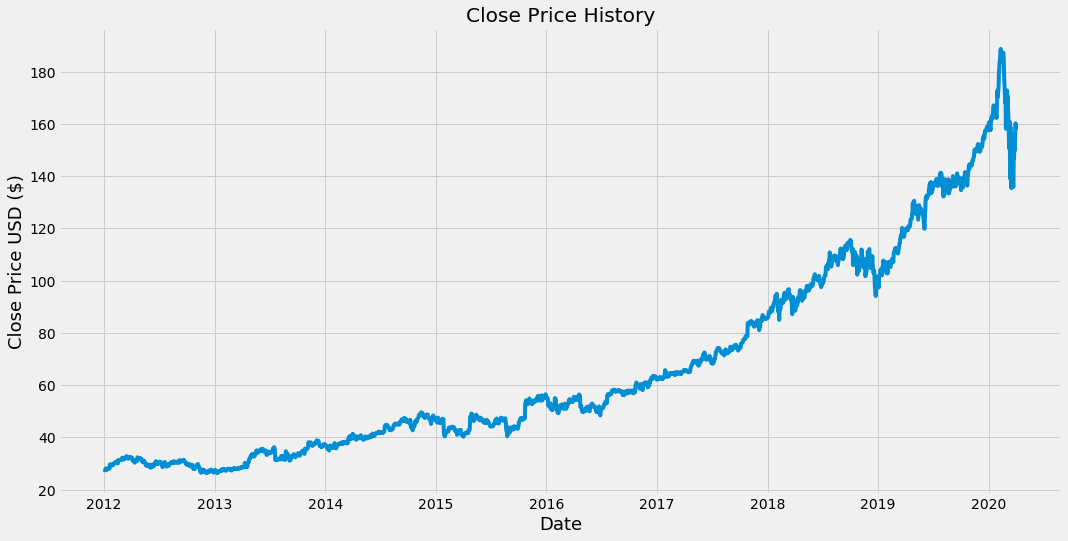

In [58]:
#Visualise the closing price 

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
#plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Close Price USD ($)' , fontsize = 18)
plt.show()

In [59]:
# Create a new dataframe with only the close column 

data = df.filter(['Close'])

# convert the dataframe to a numpy array 

dataset = data.values

#Get the number of rows to train the model on 

training_data_len = math.ceil(len(dataset)*.8) 

print(training_data_len)

1660


In [60]:
#Scale the data 

scaler = MinMaxScaler(feature_range=(0,1)) # all the values will be between 0 and 1 
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.00246411]
 [0.00634509]
 [0.00806998]
 ...
 [0.75974865]
 [0.82461651]
 [0.80909264]]


In [61]:
#Create the training data set 
#Create the scaled training data set 
 
train_data = scaled_data[0:training_data_len, : ] # the third argument is a colon because we would want all the columns 
# Contains all the values from 0 to training_data_len.

# Split the data into x_train and y_train data sets 

x_train = [] #independent training variables

y_train = [] #dependent training variables  

for i in range( 60 , len(train_data)):
    x_train.append(train_data[i-60 :i , 0]) #data sets from i-60 to i, but not including i. 
    y_train.append(train_data[i , 0]) # only the 61st value, held at column 0 
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()
 

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02057536, 0.02069857, 0.01829606,
       0.01965132, 0.01928171, 0.01761842, 0.01995934, 0.01946652,
       0.02168422, 0.02205384, 0.02384032, 0.02359391, 0.02451796,
       0.02642764, 0.02710528, 0.025442  , 0.02593482, 0.02390192,
       0.02266986, 0.03030863, 0.03006221, 0.03123267, 0.03018542,
       0.03080145, 0.03147908, 0.03067825, 0.0338816 , 0.03308076,
       0.03646892, 0.03517527, 0.03345037, 0.0319719 , 0.03369679,
       0.03474403, 0.03462083, 0.03492885, 0.03880982, 0.03942586,
       0.03991867, 0.0383786 , 0.0359145 , 0.03462083, 0.03412801,
       0.03468243, 0.03474403, 0.03831701, 0.03788579, 0.03585288])]
[0.03542166100213601]

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02

In [62]:
# Convert the x_train and the y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)


In [63]:
# Reshape the x_train data 

x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 )) # number of features is just 1, which is the closing price. 
x_train.shape 

(1600, 60, 1)

In [64]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM( 50 , return_sequences = True , input_shape = ( x_train.shape[1] ,  1)))
model.add(LSTM( 50 , return_sequences = False)) # False in this case, because we are not going to be using any LSTM models for our model 
model.add(Dense(25))
model.add(Dense(1))

In [65]:
# Compile the model 

model.compile(optimizer = 'adam' , loss = 'mean_squared_error') # adam is the name of an optimizer and 
# loss is another function for the complile function 
# an optimizer is to improve upon the loss function and the loss function is to measure how well the model did on training 


In [66]:
#Train the model 
# fit is another word for Train in ML
# batch_size is the total number of training examples present in one training set 
#epoch is defined as the number of iterations when passed forward and backward through a neural network 
model.fit(x_train , y_train , batch_size = 1 , epochs = 1 ) 


Epoch 1/1
1600/1600 [==============================] - 107s 67ms/step - loss: 4.4812e-04


In [73]:
# Create a testing dataset 
# Create a new array containing scaled values frmo index 1600 to 2600
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len: , :]

# let us create the x_test set 
for i in range(60  , len(test_data)) :
    # here we are going to append the past 60 values to the x_test dataset
    x_test.append(test_data[ i - 60 : i , 0])
    

In [74]:
# Convert the data to numpy array 
x_test = np.array(x_test)

In [75]:
# Reshape the data 
# we are doing this because we would want our data to be 3 dimensional instead of 2 dimensional 
# this is also done because the LSTM model expects a 3 dimensional shape 

x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1 ))
# the third argument is 1 because we just want the output in 1 feature, which is the closing price : the 3rd argument 
# basically denotes how many features we would want to depict 
# the first argument denotes the number of samples or the number of rows  
# the second argument determines the number of time steps or the number of columns  


In [76]:
# In this cell we would want the models predicted price values for the x_test dataset 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # here we are basically unscaling the values 


In [77]:
# Get root mean squared error (RMSE)
# it is a good measure of how accurate the model predicts the response 
# it is the standard deviation of the residuals 
# lower values of RMSE indicate a better fit 

rmse = np.sqrt(np.mean( predictions - y_test)**2) 

rmse

# a value of 0 for rmse is that the predictions were exact it basically means there was perfect prediction 
# for the RMSE, as compared with the testing data 

3.407237656450502

/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


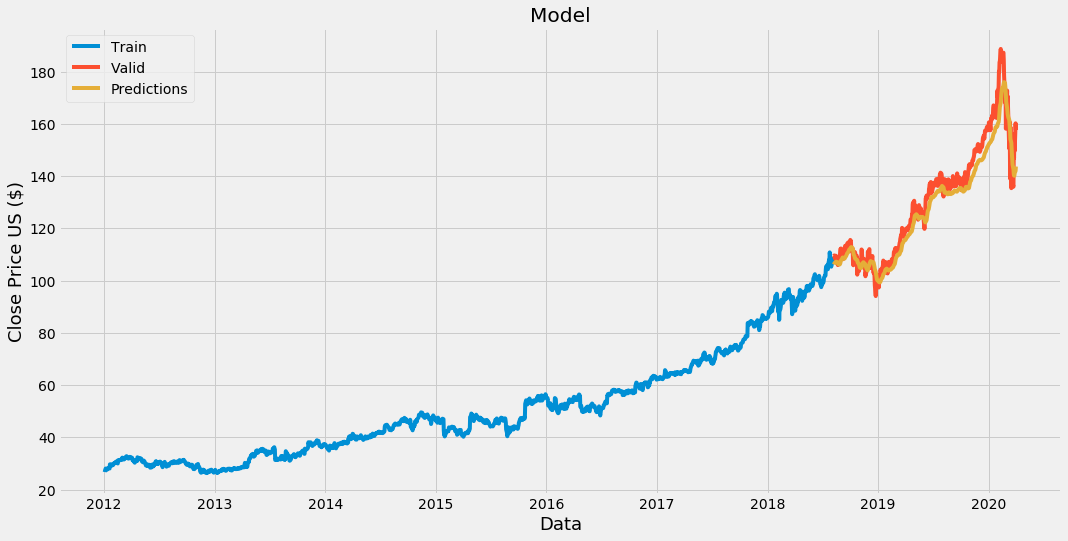

In [79]:
#Plot the data 

train = data[0:training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions 

#Visualize the model

plt.figure(figsize = (16 , 8) )
plt.title('Model')
plt.xlabel('Data' , fontsize = 18)
plt.ylabel('Close Price US ($)' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train' , 'Valid' , 'Predictions'] , loc = 'top left')
plt.show()





In [80]:
# Show the valid and the predicted prices 
valid

,Close,Predictions
Date,,
2018-08-08,109.489998,106.207207
2018-08-09,109.669998,106.478889
2018-08-10,109.000000,106.781441
2018-08-13,108.209999,107.014137
2018-08-14,109.559998,107.121628
...,...,...
2020-03-25,146.919998,140.236572
2020-03-26,156.110001,140.167740
2020-03-27,149.699997,141.158478


In [83]:
# Get the quote 
microsoft_quote = web.DataReader('MSFT' , data_source = 'yahoo' , start = '2012-01-01' , end = '2020-03-31')
# Create a new dataframe 
new_df = microsoft_quote.filter(['Close'])
# Get the last 60 day Closing price values and convert the dataframe to an array 
last_60_days = new_df[-60 : ].values
# Scale the data for the values to be between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
#Append the past 60 days to 
X_test.append(last_60_days_scaled)
# Convert a X_test to numpy array 
X_test = np.array(X_test)
#Reshape the data to be 3d
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))
#Get the predicted scale price 
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[145.37332]]


In [86]:
# Get the quote 2 
microsoft_quote2 = web.DataReader('MSFT' , data_source = 'yahoo' , start = '2020-04-01' , end = '2020-04-01')
print(microsoft_quote2['Close'])

Date
2020-03-31    157.710007
2020-04-01    152.110001
Name: Close, dtype: float64
